# MOVIE REVIEW ANALYSIS

# IMPORTING LIBRARIES

In [1]:
import pandas as panda
import numpy as np
import string

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras import layers

import seaborn as sns
import matplotlib.pyplot as plt

# VISUALIZING DATASET

In [2]:
inputdata = panda.read_csv("IMDB Dataset.csv")
inputdata

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
inputdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


<AxesSubplot:>

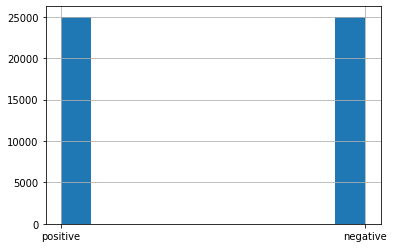

In [4]:
inputdata['sentiment'].hist()

# DATA PREPROCESSING

# SPACE REMOVAL

In [5]:
data =inputdata.review

In [6]:
def remove_space(data):  
    
    
    regex_pat = re.compile(r'\s+')
    data_space = data.str.replace(regex_pat, ' ')    
    newdata=data.str.replace(r'\s+', ' ')    
    newdata=newdata.str.replace(r'^\s+|\s+?$','')   
    newdata=newdata.str.replace(r'\d+(\.\d+)?','numbr')
    data_lower = newdata.str.lower()
    
    return data_lower

In [7]:
data_space= remove_space(data)
inputdata["review_w/o_space"]=data_space
inputdata.head()

,review,sentiment,review_w/o_space
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production. <br /><br />the...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"petter mattei's ""love in the time of money"" is..."


In [8]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jj201\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jj201\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# LEMMATIZATION

In [10]:
from nltk.stem import WordNetLemmatizer

inputdata['review_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',data)) for data in lis]) 
                     for lis in inputdata['review_w/o_space']]

# TOKENIZATION

In [11]:
inputdata["tokenized_review"] = inputdata["review_lem"].apply(lambda x: x.split())

In [12]:
inputdata.head()

,review,sentiment,review_w/o_space,review_lem,tokenized_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production. <br /><br />the...,a wonderful little production br br the...,"[a, wonderful, little, production, br, br, the..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...,basically there s a family where a little boy ...,"[basically, there, s, a, family, where, a, lit..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"petter mattei's ""love in the time of money"" is...",petter mattei s love in the time of money is...,"[petter, mattei, s, love, in, the, time, of, m..."


# STOPWORDS REMOVAL

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jj201\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stopwords = nltk.corpus.stopwords.words("english")
other_exclusions = ["br"]
stopwords.extend(other_exclusions)
stemmer = PorterStemmer()

In [15]:
inputdata["review_w/o_stop"] = inputdata["tokenized_review"].apply(lambda x: [item for item in x if item not in stopwords])
inputdata.head()

,review,sentiment,review_w/o_space,review_lem,tokenized_review,review_w/o_stop
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, numbr, o..."
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production. <br /><br />the...,a wonderful little production br br the...,"[a, wonderful, little, production, br, br, the...","[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...,basically there s a family where a little boy ...,"[basically, there, s, a, family, where, a, lit...","[basically, family, little, boy, jake, thinks,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"petter mattei's ""love in the time of money"" is...",petter mattei s love in the time of money is...,"[petter, mattei, s, love, in, the, time, of, m...","[petter, mattei, love, time, money, visually, ..."


# STEMMING

In [16]:
processed_review = inputdata["review_w/o_stop"].apply(lambda x: [stemmer.stem(i) for i in x]) 

In [17]:
 for i in range(len(processed_review)):
        processed_review[i] = ' '.join(processed_review[i])
        review_p= processed_review

In [18]:
inputdata['processed_review'] = review_p

# PROCESSED REVIEW

In [19]:
inputdata.head()

,review,sentiment,review_w/o_space,review_lem,tokenized_review,review_w/o_stop,processed_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, numbr, o...",one review mention watch numbr oz episod hook ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production. <br /><br />the...,a wonderful little production br br the...,"[a, wonderful, little, production, br, br, the...","[wonderful, little, production, filming, techn...",wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su...",thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...,basically there s a family where a little boy ...,"[basically, there, s, a, family, where, a, lit...","[basically, family, little, boy, jake, thinks,...",basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"petter mattei's ""love in the time of money"" is...",petter mattei s love in the time of money is...,"[petter, mattei, s, love, in, the, time, of, m...","[petter, mattei, love, time, money, visually, ...",petter mattei love time money visual stun film...


# RAW INPUT DATA & PROCESSED DATA

In [20]:
inputdata.review

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [21]:
inputdata.processed_review

0        one review mention watch numbr oz episod hook ...
1        wonder littl product film techniqu unassum old...
2        thought wonder way spend time hot summer weeke...
3        basic famili littl boy jake think zombi closet...
4        petter mattei love time money visual stun film...
                               ...                        
49995    thought movi right good job creativ origin fir...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    go disagre previou comment side maltin one sec...
49999    one expect star trek movi high art fan expect ...
Name: processed_review, Length: 50000, dtype: object

# ENCODING TARGET LABEL

In [22]:
labels = inputdata['sentiment']

encoder = OneHotEncoder(sparse=False)

labels = encoder.fit_transform(np.array(labels).reshape(-1, 1))

# FEATURE EXTRACTION

In [23]:
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

reviewstop = inputdata['review_w/o_stop'] 
data1 = []

for i in range(len(reviewstop)):
    data1.append(detokenize(reviewstop[i]))
print(data1[:1])

['one reviewers mentioned watching numbr oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack stree

In [24]:
data1 = np.array(data1)

# ONE HOT FEATURE (F1)

In [25]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data1)
sequences = tokenizer.texts_to_sequences(data1)
feature_1 = pad_sequences(sequences, maxlen=max_len)
print(feature_1)

[[   0    0    0 ... 1064 3917  358]
 [   0    0    0 ... 1811   13  114]
 [   0    0    0 ...   52   12  234]
 ...
 [   0    0    0 ...  238  367 3805]
 [   0    0    0 ... 1923 4003  597]
 [   0    0    0 ... 4263  652    1]]


In [26]:
feature_1.shape

(50000, 200)

In [27]:
labels.shape

(50000, 2)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(feature_1,labels, random_state=0)
print (len(X_train),len(X_test),len(y_train),len(y_test))

37500 12500 37500 12500


# LSTM MODEL

In [29]:
model = Sequential()

model.add(layers.Embedding(max_words, 20))

model.add(layers.LSTM(15,dropout=0.5))

model.add(layers.Flatten())
model.add(layers.Dropout(0.25))

model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(2,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto',
                             period=1,save_weights_only=False)

# TRAINING THE MODEL WITH F1

In [31]:
history1 = model.fit(X_train, y_train,steps_per_epoch=20,epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/10
20/20 [==============================] - 16s 599ms/step - loss: 0.6915 - accuracy: 0.5508 - val_loss: 0.6860 - val_accuracy: 0.6788

Epoch 00001: val_accuracy improved from -inf to 0.67880, saving model to best_model.hdf5
Epoch 2/10
20/20 [==============================] - 11s 568ms/step - loss: 0.6522 - accuracy: 0.7214 - val_loss: 0.5620 - val_accuracy: 0.7925

Epoch 00002: val_accuracy improved from 0.67880 to 0.79248, saving model to best_model.hdf5
Epoch 3/10
20/20 [==============================] - 11s 580ms/step - loss: 0.4165 - accuracy: 0.8297 - val_loss: 0.3475 - val_accuracy: 0.8530

Epoch 00003: val_accuracy improved from 0.79248 to 0.85296, saving model to best_model.hdf5
Epoch 4/10
20/20 [==============================] - 12s 588ms/step - loss: 0.3055 - accuracy: 0.8758 - val_loss: 0.3055 - val_accuracy: 0.8732

Epoch 00004: val_accuracy improved from 0.85296 to 0.87320, saving model to best_model.hdf5
Epoch 5/10
20/20 [==============================] - 11s 580

# ACCURACY & LOSS CURVE FOR LSTM MODEL WITH FEATURE F1

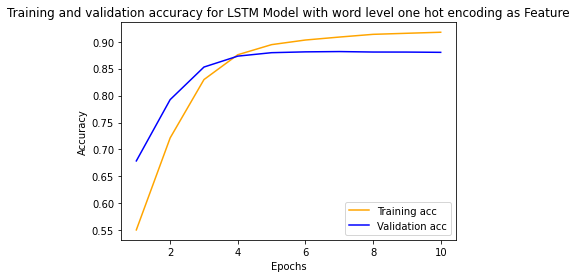

<Figure size 432x288 with 0 Axes>

In [32]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

epochs = range(1, 11)

plt.plot(epochs, acc, 'orange', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy for LSTM Model with word level one hot encoding as Feature')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

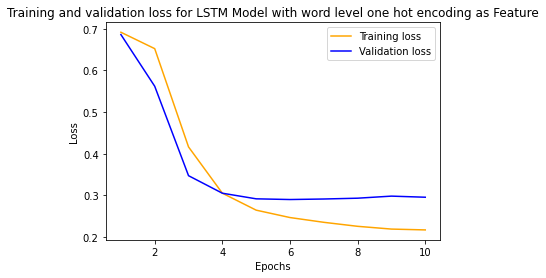

In [33]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, 11)
plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for LSTM Model with word level one hot encoding as Feature')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# EVALUATING LSTM MODEL WITH FEATURE F1

In [34]:
score1 = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.2958442270755768
Test accuracy: 0.8802400231361389


# CONFUSION MATRIX

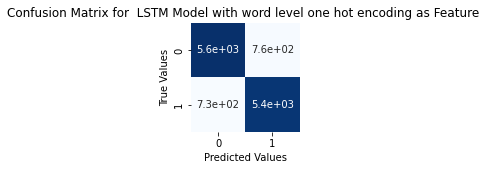

In [35]:
fig = plt.figure(figsize=(2, 2)) 

y_preds = model.predict(X_test) 

Y_pred = np.argmax(y_preds, 1) 
Y_test = np.argmax(y_test, 1) 

mat = confusion_matrix(Y_test, Y_pred) 

sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for  LSTM Model with word level one hot encoding as Feature ')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

# NAIVE BAYES MODEL WITH FEATURE F1

In [36]:
y = inputdata['sentiment'].replace({'negative': 0, 'positive': 1})
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(feature_1,y, random_state=0)
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

In [37]:
nb=GaussianNB()
nb.fit(X_train_1,y_train_1)
y_preds_1 = nb.predict(X_test_1)
ac_1=accuracy_score(y_test_1,y_preds_1)
report = classification_report( y_test_1, y_preds_1 )
print(report)
print("Naive Bayes, Accuracy Score:",ac_1)

print(" ")
print("Confusion Matrix")
cm = confusion_matrix(y_test_1,y_preds_1)
print(cm)

              precision    recall  f1-score   support

           0       0.51      0.80      0.62      6291
           1       0.53      0.23      0.32      6209

    accuracy                           0.51     12500
   macro avg       0.52      0.51      0.47     12500
weighted avg       0.52      0.51      0.47     12500

Naive Bayes, Accuracy Score: 0.51424
 
Confusion Matrix
[[5009 1282]
 [4790 1419]]


# COMPARISON OF LSTM & NAIVE BAYES MODEL

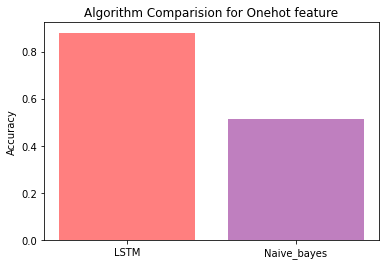

In [38]:
objects = ('LSTM', 'Naive_bayes')
y_pos = np.arange(len(objects))
performance = [score1[1],ac_1]
plt.bar(y_pos, performance, align='center', alpha=0.5,color=['red', 'purple'])
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for Onehot feature')
plt.show()

# TFIDF FEATURE (F2)

In [39]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=500)
feature_2 = tfidf_vectorizer.fit_transform(inputdata['processed_review'] ).toarray()
feature_2

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.14010715],
       ...,
       [0.        , 0.        , 0.19097554, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [40]:
feature_2.shape

(50000, 500)

In [41]:
X = feature_2
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, labels, random_state=42, test_size=0.2)

# TRAINING THE LSTM MODEL

In [42]:
history2 = model.fit(X_train1, y_train1, steps_per_epoch=20, epochs=10,  validation_data=(X_test1, y_test1),
                     callbacks=[checkpoint])

Epoch 1/10
20/20 [==============================] - 38s 2s/step - loss: 0.7125 - accuracy: 0.5015 - val_loss: 0.6939 - val_accuracy: 0.4961

Epoch 00001: val_accuracy did not improve from 0.88168
Epoch 2/10
20/20 [==============================] - 41s 2s/step - loss: 0.6986 - accuracy: 0.4979 - val_loss: 0.6931 - val_accuracy: 0.5039

Epoch 00002: val_accuracy did not improve from 0.88168
Epoch 3/10
20/20 [==============================] - 44s 2s/step - loss: 0.6956 - accuracy: 0.4993 - val_loss: 0.6931 - val_accuracy: 0.5039

Epoch 00003: val_accuracy did not improve from 0.88168
Epoch 4/10
20/20 [==============================] - 45s 2s/step - loss: 0.6956 - accuracy: 0.4964 - val_loss: 0.6934 - val_accuracy: 0.4961

Epoch 00004: val_accuracy did not improve from 0.88168
Epoch 5/10
20/20 [==============================] - 45s 2s/step - loss: 0.6947 - accuracy: 0.4984 - val_loss: 0.6938 - val_accuracy: 0.4961

Epoch 00005: val_accuracy did not improve from 0.88168
Epoch 6/10
20/20 [==

# ACCURACY & LOSS CURVE FOR LSTM MODEL WITH FEATURE F2

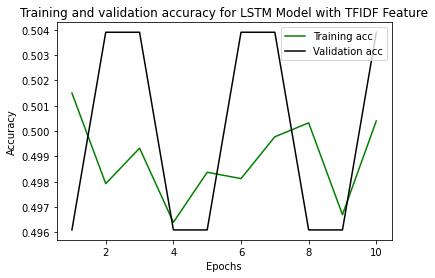

<Figure size 432x288 with 0 Axes>

In [43]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

epochs = range(1, 11)

plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'black', label='Validation acc')
plt.title('Training and validation accuracy for LSTM Model with TFIDF Feature')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

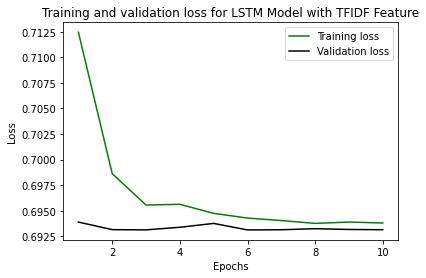

In [44]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, 11)

plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'black', label='Validation loss')
plt.title('Training and validation loss for LSTM Model with TFIDF Feature')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# EVALUATING THE MODEL WITH FEATURE F2

In [45]:
score2 = model.evaluate(X_test1, y_test1, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.693137526512146
Test accuracy: 0.5038999915122986


# CONFUSION MATRIX

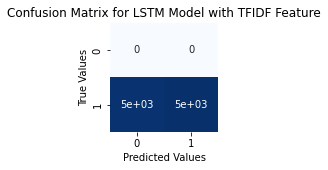

In [46]:
fig = plt.figure(figsize=(2, 2)) 
y_preds = model.predict(X_test1) 

Y_pred = np.argmax(y_preds, 1) 
Y_test = np.argmax(y_test1, 1) 

mat = confusion_matrix(Y_test, Y_pred) 

sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for LSTM Model with TFIDF Feature')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

# NAIVE BAYES MODEL WITH FEATURE F2

In [47]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(feature_2,y, random_state=0)
nb=GaussianNB()
nb.fit(X_train_2,y_train_2)
y_preds_2 = nb.predict(X_test_2)
ac_2=accuracy_score(y_test_2,y_preds_2)
report = classification_report( y_test_2, y_preds_2 )
print(report)
print("Naive Bayes, Accuracy Score:",ac_2)

print(" ")
print("Confusion Matrix")
cm = confusion_matrix(y_test_2,y_preds_2)
print(cm)

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      6291
           1       0.80      0.82      0.81      6209

    accuracy                           0.81     12500
   macro avg       0.81      0.81      0.81     12500
weighted avg       0.81      0.81      0.81     12500

Naive Bayes, Accuracy Score: 0.80624
 
Confusion Matrix
[[5008 1283]
 [1139 5070]]


# COMPARISON OF LSTM & NAIVE BAYES MODEL

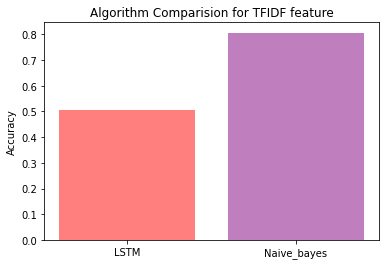

In [48]:
objects = ('LSTM', 'Naive_bayes')
y_pos = np.arange(len(objects))
performance = [score2[1],ac_2]
plt.bar(y_pos, performance, align='center', alpha=0.5,color=['red', 'purple'])
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for TFIDF feature')
plt.show()

# BAG OF WORDS FEATURE (F3)

In [49]:
bow_vectorizer = CountVectorizer( max_features=100, stop_words='english', ngram_range=(2,2))
feature_3=bow_vectorizer.fit_transform(inputdata['processed_review'] ).toarray()
feature_3

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
feature_3.shape

(50000, 100)

In [51]:
X = feature_3
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, labels, random_state=42, test_size=0.2)

# TRAINING THE LSTM MODEL

In [52]:
history3 = model.fit(X_train2, y_train2, epochs=10, steps_per_epoch=20, validation_data=(X_test2, y_test2),
                     callbacks=[checkpoint])

Epoch 1/10
20/20 [==============================] - 8s 348ms/step - loss: 0.6928 - accuracy: 0.5050 - val_loss: 0.6929 - val_accuracy: 0.4961

Epoch 00001: val_accuracy did not improve from 0.88168
Epoch 2/10
20/20 [==============================] - 6s 310ms/step - loss: 0.6927 - accuracy: 0.5124 - val_loss: 0.6925 - val_accuracy: 0.4961

Epoch 00002: val_accuracy did not improve from 0.88168
Epoch 3/10
20/20 [==============================] - 6s 312ms/step - loss: 0.6926 - accuracy: 0.5142 - val_loss: 0.6917 - val_accuracy: 0.5536

Epoch 00003: val_accuracy did not improve from 0.88168
Epoch 4/10
20/20 [==============================] - 6s 328ms/step - loss: 0.6919 - accuracy: 0.5183 - val_loss: 0.6912 - val_accuracy: 0.5550

Epoch 00004: val_accuracy did not improve from 0.88168
Epoch 5/10
20/20 [==============================] - 6s 318ms/step - loss: 0.6913 - accuracy: 0.5256 - val_loss: 0.6904 - val_accuracy: 0.5546

Epoch 00005: val_accuracy did not improve from 0.88168
Epoch 6/10

# ACCURACY & LOSS CURVES FOR LSTM MODEL WITH FEATURE F3

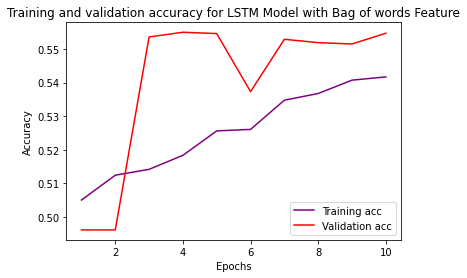

<Figure size 432x288 with 0 Axes>

In [53]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

epochs = range(1, 11)

plt.plot(epochs, acc, 'purple', label='Training acc')
plt.plot(epochs, val_acc, 'red', label='Validation acc')
plt.title('Training and validation accuracy for LSTM Model with Bag of words Feature')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

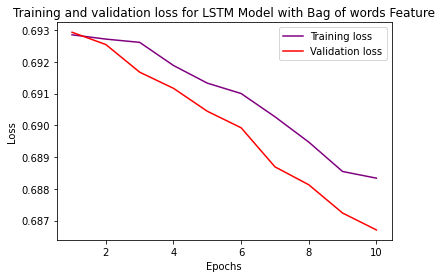

In [54]:
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, 11)

plt.plot(epochs, loss, 'purple', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss for LSTM Model with Bag of words Feature')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# EVALUATE THE MODEL WITH FEATURE F3

In [55]:
score3 = model.evaluate(X_test2, y_test2, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 0.6867079138755798
Test accuracy: 0.5547000169754028


# CONFUSION MATRIX

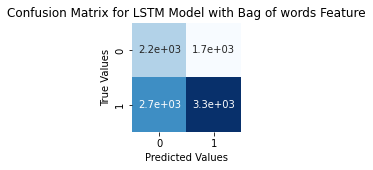

In [56]:
fig = plt.figure(figsize=(2, 2)) 

y_preds = model.predict(X_test2) 

Y_pred = np.argmax(y_preds, 1) 
Y_test = np.argmax(y_test2, 1) 

mat = confusion_matrix(Y_test, Y_pred) 

sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for LSTM Model with Bag of words Feature')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

# NAIVE BAYES MODEL WITH FEATURE F3

In [57]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(feature_3,y, random_state=0)
nb=GaussianNB()
nb.fit(X_train_3,y_train_3)
y_preds_3 = nb.predict(X_test_3)
ac_3=accuracy_score(y_test_3,y_preds_3)
report = classification_report( y_test_3, y_preds_3 )
print(report)
print("Naive Bayes, Accuracy Score:",ac_3)

print(" ")
print("Confusion Matrix")
cm = confusion_matrix(y_test_3,y_preds_3)
print(cm)

              precision    recall  f1-score   support

           0       0.74      0.45      0.56      6291
           1       0.60      0.84      0.70      6209

    accuracy                           0.64     12500
   macro avg       0.67      0.64      0.63     12500
weighted avg       0.67      0.64      0.63     12500

Naive Bayes, Accuracy Score: 0.6424
 
Confusion Matrix
[[2801 3490]
 [ 980 5229]]


# COMPARISON OF LSTM MODEL & NAIVE BAYES MODEL

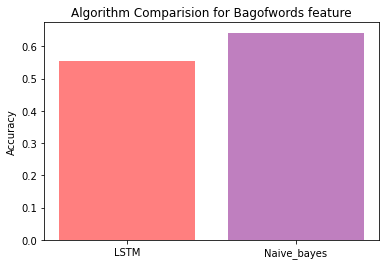

In [58]:
objects = ('LSTM', 'Naive_bayes')
y_pos = np.arange(len(objects))
performance = [score3[1],ac_3]
plt.bar(y_pos, performance, align='center', alpha=0.5,color=['red', 'purple'])
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for Bagofwords feature')
plt.show()

# COMBINING F1+F2+F3

In [59]:
modelling_features = np.concatenate([feature_1,feature_2,feature_3],axis=1)
modelling_features.shape

(50000, 800)

In [60]:
X = modelling_features
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, labels, random_state=42, test_size=0.2)

# TRAINING THE LSTM MODEL

In [61]:
history4= model.fit(X_train3, y_train3, epochs=10, steps_per_epoch=20, validation_data=(X_test3, y_test3),
                    callbacks=[checkpoint])

Epoch 1/10
20/20 [==============================] - 94s 4s/step - loss: 0.6877 - accuracy: 0.5416 - val_loss: 0.6867 - val_accuracy: 0.5489

Epoch 00001: val_accuracy did not improve from 0.88168
Epoch 2/10
20/20 [==============================] - 94s 5s/step - loss: 0.6870 - accuracy: 0.5446 - val_loss: 0.6858 - val_accuracy: 0.5528

Epoch 00002: val_accuracy did not improve from 0.88168
Epoch 3/10
20/20 [==============================] - 98s 5s/step - loss: 0.6866 - accuracy: 0.5431 - val_loss: 0.6859 - val_accuracy: 0.5490

Epoch 00003: val_accuracy did not improve from 0.88168
Epoch 4/10
20/20 [==============================] - 97s 5s/step - loss: 0.6865 - accuracy: 0.5452 - val_loss: 0.6849 - val_accuracy: 0.5506

Epoch 00004: val_accuracy did not improve from 0.88168
Epoch 5/10
20/20 [==============================] - 99s 5s/step - loss: 0.6860 - accuracy: 0.5454 - val_loss: 0.6848 - val_accuracy: 0.5511

Epoch 00005: val_accuracy did not improve from 0.88168
Epoch 6/10
20/20 [==

# ACCURACY & LOSS CURVE FOR LSTM MODEL WITH FEATURE (F1+F2+F3) 

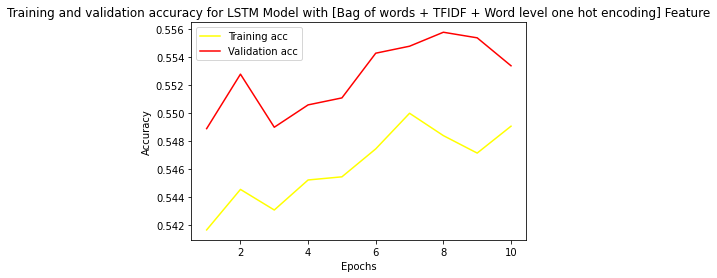

<Figure size 432x288 with 0 Axes>

In [62]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

epochs = range(1, 11)

plt.plot(epochs, acc, 'yellow', label='Training acc')
plt.plot(epochs, val_acc, 'red', label='Validation acc')
plt.title('Training and validation accuracy for LSTM Model with [Bag of words + TFIDF + Word level one hot encoding] Feature')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

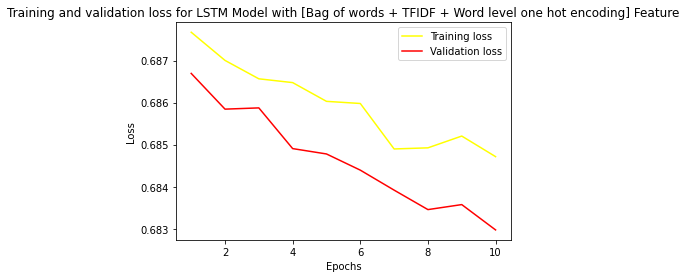

In [63]:
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(1, 11)

plt.plot(epochs, loss, 'yellow', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss for LSTM Model with [Bag of words + TFIDF + Word level one hot encoding] Feature')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# EVALUATING THE MODEL WITH FEATURE (F1+F2+F3)

In [64]:
score4 = model.evaluate(X_test3, y_test3, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Test loss: 0.6829714775085449
Test accuracy: 0.5533999800682068


# CONFUSION MATRIX

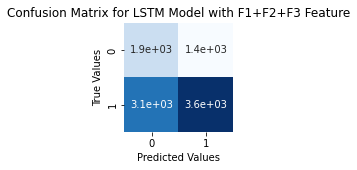

In [75]:
fig = plt.figure(figsize=(2, 2)) 

y_preds = model.predict(X_test3) 

Y_pred = np.argmax(y_preds, 1) 
Y_test = np.argmax(y_test3, 1) 

mat = confusion_matrix(Y_test, Y_pred) 

sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for LSTM Model with F1+F2+F3 Feature')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

# NAIVE BAYES MODEL WITH FEATURE (F1+F2+F3)

In [66]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split( modelling_features,y, random_state=0)
nb=GaussianNB()
nb.fit(X_train_4,y_train_4)
y_preds_4 = nb.predict(X_test_4)
ac_4=accuracy_score(y_test_4,y_preds_4)
report = classification_report( y_test_4, y_preds_4 )
print(report)
print("Naive Bayes, Accuracy Score:",ac_4)
print(" ")
print("Confusion Matrix")
cm = confusion_matrix(y_test_4,y_preds_4)
print(cm)

              precision    recall  f1-score   support

           0       0.79      0.72      0.75      6291
           1       0.74      0.81      0.77      6209

    accuracy                           0.76     12500
   macro avg       0.77      0.76      0.76     12500
weighted avg       0.77      0.76      0.76     12500

Naive Bayes, Accuracy Score: 0.76296
 
Confusion Matrix
[[4519 1772]
 [1191 5018]]


# COMPARISON OF LSTM & NAIVE BAYES MODEL

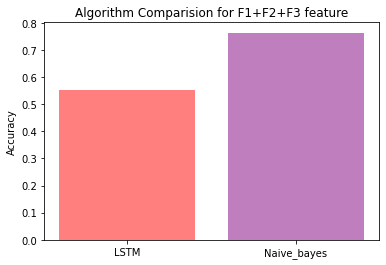

In [67]:
objects = ('LSTM', 'Naive_bayes')
y_pos = np.arange(len(objects))
performance = [score4[1],ac_4]
plt.bar(y_pos, performance, align='center', alpha=0.5,color=['red', 'purple'])
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for F1+F2+F3 feature')
plt.show()

# LSTM MODEL WITH DIFFERENT FEATURES

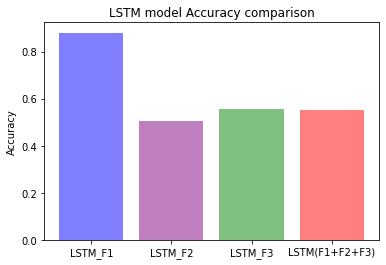

In [68]:
objects = ('LSTM_F1', 'LSTM_F2','LSTM_F3', 'LSTM(F1+F2+F3)')
y_pos = np.arange(len(objects))
performance = [score1[1],score2[1],score3[1],score4[1]]
plt.bar(y_pos, performance, align='center', alpha=0.5,color=['blue', 'purple','green','red'])
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('LSTM model Accuracy comparison')
plt.show()

# NAIVE BAYES MODEL WITH DIFFERENT FEATURES

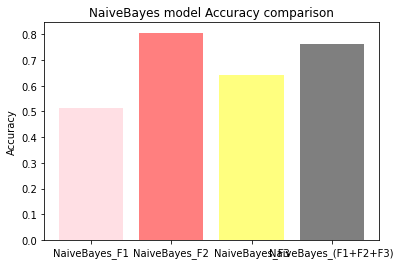

In [69]:
objects = ('NaiveBayes_F1', 'NaiveBayes_F2','NaiveBayes_F3','NaiveBayes_(F1+F2+F3)')
y_pos = np.arange(len(objects))
performance = [ac_1,ac_2,ac_3,ac_4]
plt.bar(y_pos, performance, align='center', alpha=0.5,color=['pink', 'red','yellow','black'])
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('NaiveBayes model Accuracy comparison')
plt.show()

# LSTM MODEL SUMMARY

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 20)          100000    
_________________________________________________________________
lstm (LSTM)                  (None, 15)                2160      
_________________________________________________________________
flatten (Flatten)            (None, 15)                0         
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense (Dense)                (None, 512)               8192      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 111,378
Trainable params: 111,378
Non-trainable params: 0
__________________________________________________

# TESTING

In [71]:
import keras
best_model = keras.models.load_model("best_model.hdf5")

In [72]:
review = ['Negative','Positive']

In [73]:
sequence = tokenizer.texts_to_sequences(['this is a worst movie'])
test = pad_sequences(sequence, maxlen=max_len)
review[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

'Negative'

In [74]:
sequence = tokenizer.texts_to_sequences(['this is one of the best movie i had ever seen'])
test = pad_sequences(sequence, maxlen=max_len)
review[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

'Positive'